In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# 读取数据
city_facilities_data = pd.read_csv("city_facilities.csv")

# 提取必要的列
city_facilities_neighborhoods = city_facilities_data["neighborhood"]
population_data = []
with open("population.csv", "r") as file:
    next(file)  # 跳过表头
    for line in file:
        parts = line.strip().split(",")
        neighborhood = parts[1]  # 第二个元素是 Neighborhood
        estimate_total = parts[3]  # 第四个元素是 Estimate Total
        population_data.append([neighborhood, int(float(estimate_total))])  # 转换为整数

# 创建 DataFrame
population_data = pd.DataFrame(population_data, columns=["Neighborhood", "Estimate Total"])

# 找出重叠的 neighborhood
overlapping_neighborhoods = set(city_facilities_neighborhoods).intersection(population_neighborhoods)

# 过滤出重叠的 neighborhood 并创建新的数据集
filtered_population_data = population_data[population_data["Neighborhood"].isin(overlapping_neighborhoods)]
filtered_facilities_data = city_facilities_data[city_facilities_data["neighborhood"].isin(overlapping_neighborhoods)]

# 统计每个 neighborhood 拥有的设施数量
facilities_count = filtered_facilities_data["neighborhood"].value_counts().reset_index()
facilities_count.columns = ["Neighborhood", "Facility Count"]


           Neighborhood  Estimate Total
0      Allegheny Center            1411
1        Allegheny West             343
2             Allentown            2558
5            Banksville            3858
6     Bedford Dwellings            1349
..                  ...             ...
86  Upper Lawrenceville            2754
87             West End             235
88         West Oakland            1717
89             Westwood            3537
90              Windgap            1534

[75 rows x 2 columns]
            Neighborhood  Facility Count
0          Highland Park              30
1    Squirrel Hill South              29
2            Perry North              20
3              Brookline              19
4         Strip District              15
..                   ...             ...
70            Glen Hazel               1
71               Larimer               1
72  California-Kirkbride               1
73    Point Breeze North               1
74           Middle Hill               1

[75 

In [10]:
facilities_count = facilities_count.sort_values(by="Neighborhood")  # 按字母顺序排序

# 显示完整的结果
print(filtered_population_data)
print(facilities_count)

           Neighborhood  Estimate Total
0      Allegheny Center            1411
1        Allegheny West             343
2             Allentown            2558
5            Banksville            3858
6     Bedford Dwellings            1349
..                  ...             ...
86  Upper Lawrenceville            2754
87             West End             235
88         West Oakland            1717
89             Westwood            3537
90              Windgap            1534

[75 rows x 2 columns]
           Neighborhood  Facility Count
29     Allegheny Center               4
35       Allegheny West               3
49            Allentown               3
19           Banksville               7
23    Bedford Dwellings               6
..                  ...             ...
58  Upper Lawrenceville               1
57             West End               2
60         West Oakland               1
28             Westwood               4
42              Windgap               3

[75 rows x 2 col

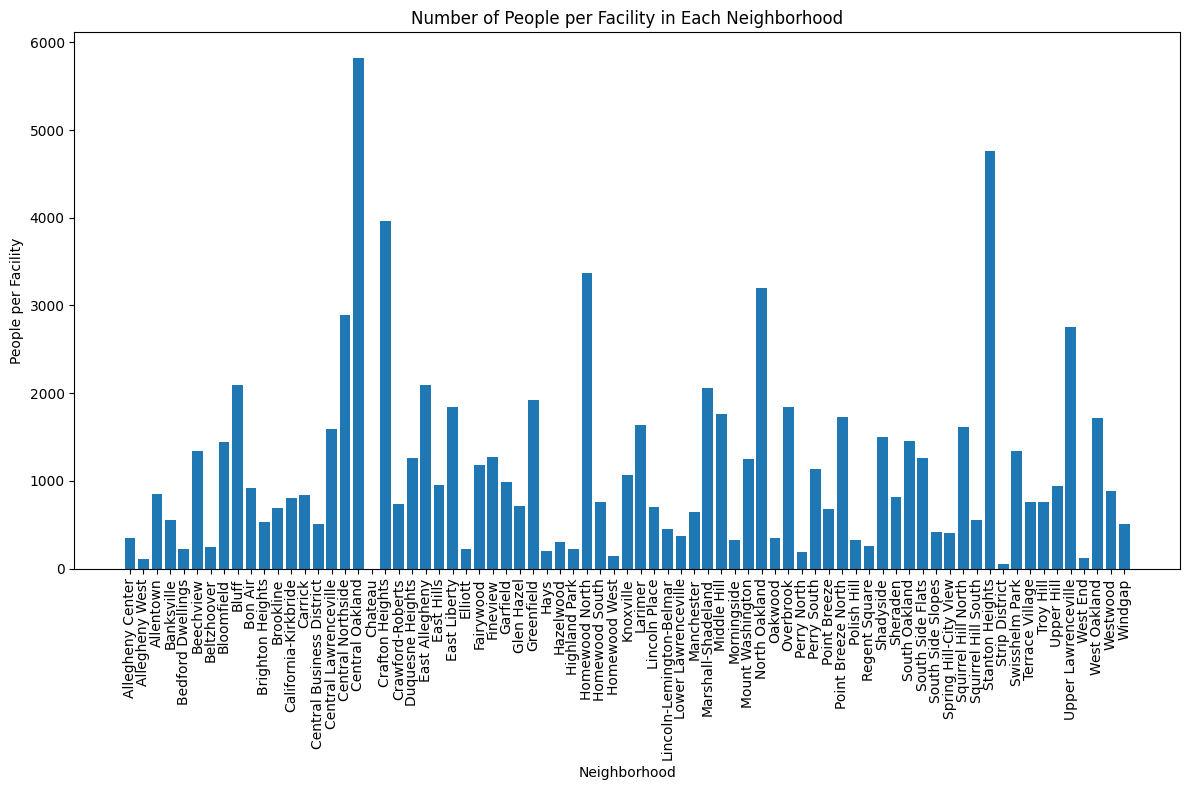

In [8]:
facilities_count_df = pd.DataFrame(facilities_count, columns=["Neighborhood", "Facility Count"])
merged_data = pd.merge(filtered_population_data, facilities_count_df, on="Neighborhood")

# 计算每个 neighborhood 的人均设施数
merged_data["People per Facility"] = merged_data["Estimate Total"] / merged_data["Facility Count"]

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(merged_data["Neighborhood"], merged_data["People per Facility"])
plt.xlabel("Neighborhood")
plt.ylabel("People per Facility")
plt.title("Number of People per Facility in Each Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()